## Algerian Forest Fires Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [3]:
data = pd.read_csv(r"C:\Users\v-manohar.raj\Desktop\Own Use Docs\Algerian_forest_fires_dataset.csv")

In [4]:
data.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
180,26,7,2012,35,58,10,0.2,78.3,10.8,19.7,1.6,10.7,1,not fire
96,5,9,2012,29,75,16,0,80.8,3.4,24,2.8,5.1,1.7,fire
164,10,7,2012,34,51,16,3.8,77.5,8,9.5,2,7.7,1.3,not fire
210,25,8,2012,34,40,18,0,92.1,56.3,157.5,14.3,59.5,31.1,fire
40,11,7,2012,33,76,14,0,81.1,8.1,18.7,2.6,8.1,2.2,not fire


In [5]:
data.shape

(247, 14)

## Data Cleaning

In [6]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [7]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
data.loc[:122,"Region"]=0
data.loc[122:,"Region"]=1
data=data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [10]:
data[['Region']]=data[['Region']].astype(int)

In [11]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [12]:
data=data.dropna().reset_index()

In [13]:
data=data.drop(122).reset_index(drop=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    object
 2   month        243 non-null    object
 3   year         243 non-null    object
 4   Temperature  243 non-null    object
 5    RH          243 non-null    object
 6    Ws          243 non-null    object
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int32 
dtypes: int32(1), int64(1), object(14)
memory usage: 29.6+ KB


In [15]:
data.drop('index',axis=1,inplace=True)

In [16]:
data.sample(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
186,5,8,2012,34,42,17,0.1,88.3,23.6,52.5,19,23.5,12.6,fire,1
199,18,8,2012,37,37,14,0,94.3,35.9,86.8,16,35.9,26.3,fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0


In [17]:
data[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']]=data[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4    RH          243 non-null    int32 
 5    Ws          243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [19]:
data[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=data[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [20]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
for column in data.columns:
    if ' ' in column[0]:
        data.rename(columns={column:column.lstrip(' ')},inplace=True)
    else:
        data.rename(columns={column:column.rstrip(' ')},inplace=True)

In [22]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:
data['Classes'] = data['Classes'].str.strip()

In [41]:
encoded = OrdinalEncoder(categories = [['not fire','fire']])

In [42]:
data['Classes'] = encoded.fit_transform(data[['Classes']])

In [45]:
data['Classes'] = data['Classes'].astype(int)

In [47]:
data['Classes'].unique()

array([0, 1])

## Exploratory Data Analysis

<Axes: >

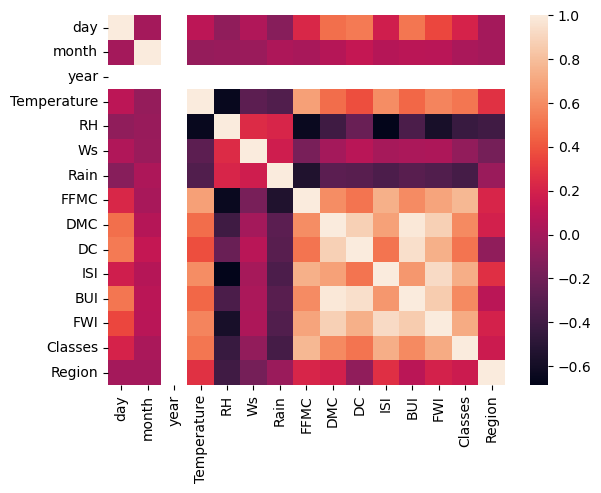

In [52]:
# heatmap for correlations:
sns.heatmap(data.corr())

In [65]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<Axes: xlabel='month', ylabel='Rain'>

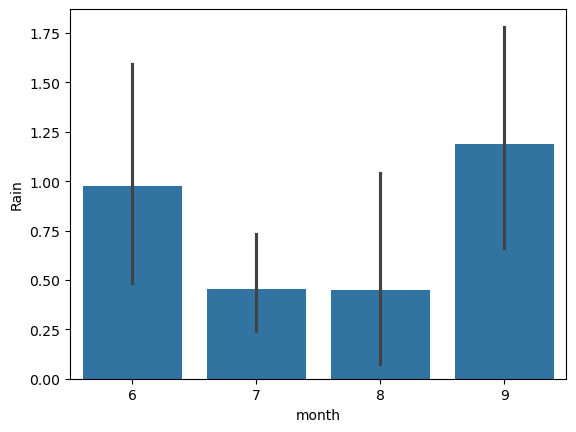

In [67]:
# month wise rain trend
sns.barplot(data=data,x='month',y='Rain')

<Axes: xlabel='Region', ylabel='count'>

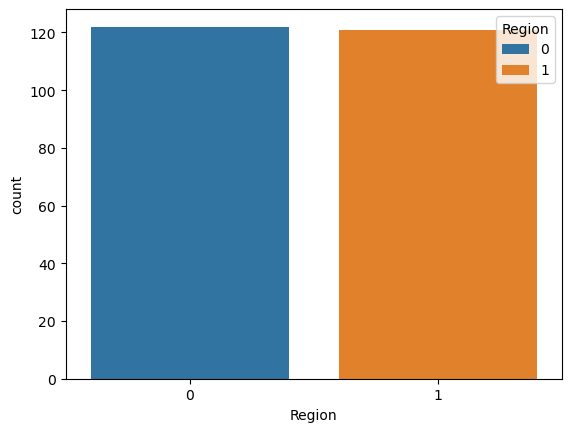

In [72]:
sns.countplot(data=data,x='Region',hue='Region')

<Axes: >

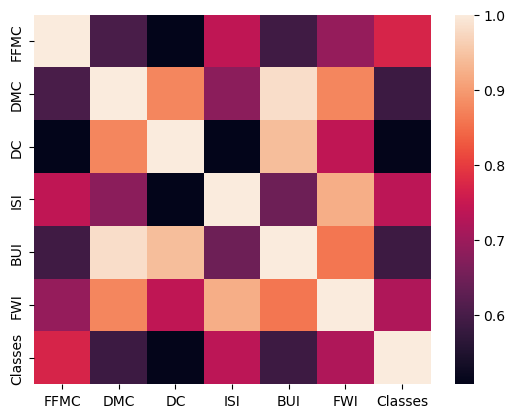

In [75]:
# Influence of fire related indexes on Classes:
corr_data = data[['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI','Classes']]
sns.heatmap(corr_data.corr())

<Axes: xlabel='Classes', ylabel='DMC'>

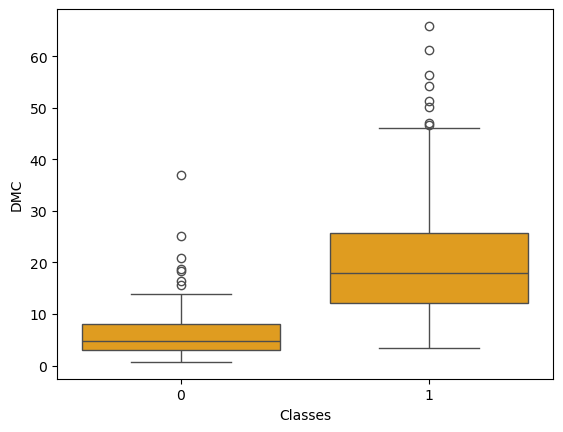

In [85]:
# Past Fire Trends: 
sns.boxplot(data=data,x='Classes',y='DMC',color='Orange')

<Axes: xlabel='month', ylabel='count'>

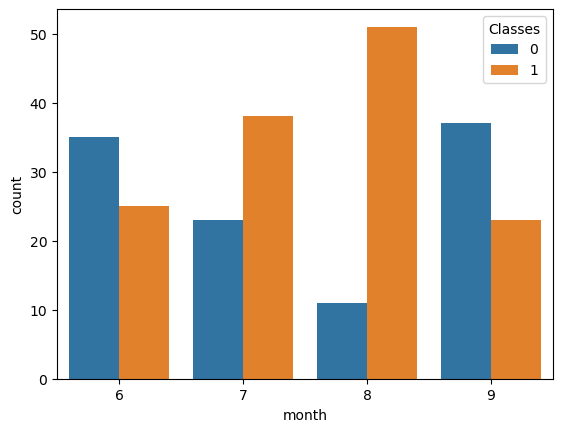

In [97]:
# which month highest number of fire & no fire events
sns.countplot(data=data,x='month',hue='Classes')

<Axes: xlabel='RH', ylabel='Ws'>

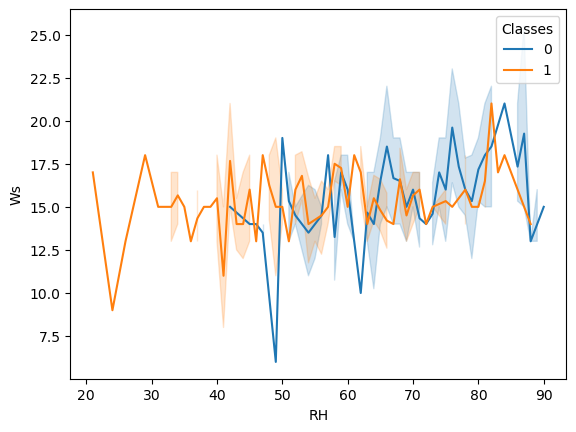

In [92]:
# Reltionship between Relative Humidity ('RH') and Wind Speed ('Ws'):
sns.lineplot(data=data,x='RH',y='Ws',hue='Classes')

<Axes: xlabel='month', ylabel='FWI'>

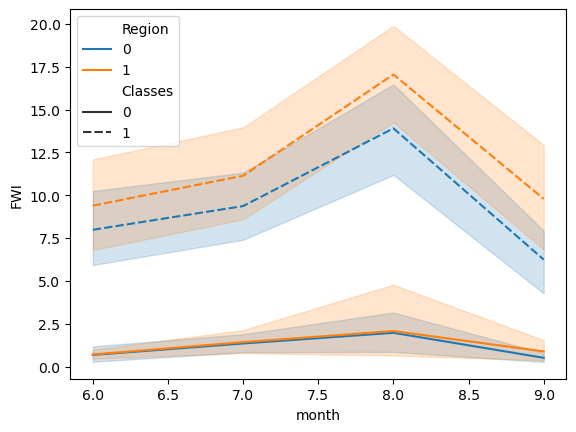

In [96]:
# FWI by month to identify when it peaks in different regions
sns.lineplot(data=data,x='month',y='FWI',hue='Region',style='Classes')


## Feature Selection

In [98]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [100]:
data.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [101]:
data.sample(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
131,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,1,1
224,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,1,1


<Axes: >

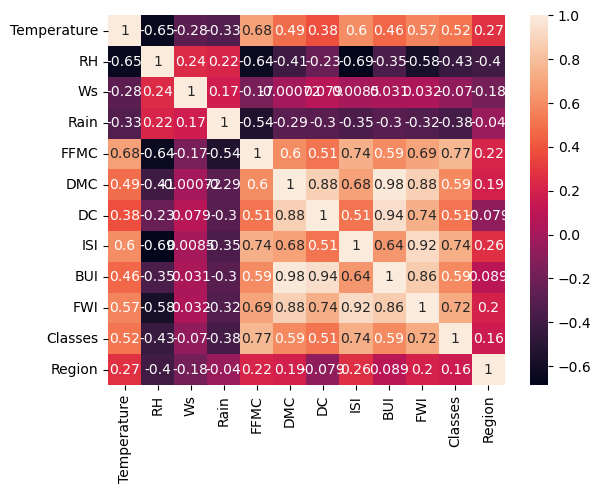

In [102]:
sns.heatmap(data.corr(),annot=True)

In [103]:
def remove_highly_correlated_features(df, threshold=0.9):
    # Compute the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create a mask to identify highly correlated pairs
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify features with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop highly correlated features
    df_dropped = df.drop(columns=to_drop)
    
    print(f"Dropped features: {to_drop}")
    
    return df_dropped

In [106]:
data = remove_highly_correlated_features(data, threshold=0.9)

Dropped features: ['BUI', 'FWI']


In [107]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.735197,0.263197
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,1.000000,0.162347
Region,0.269555,-0.402682,-0.181160,-0.040013,0.222241,0.192089,-0.078734,0.263197,0.162347,1.000000


In [112]:
X= data.drop('ISI',axis=1)
y = data['ISI']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.27,random_state=42)

In [116]:
std_scl = StandardScaler()

In [117]:
x_train_scaled = std_scl.fit_transform(X_train)

In [118]:
x_test_scaled = std_scl.transform(X_test)

<Axes: >

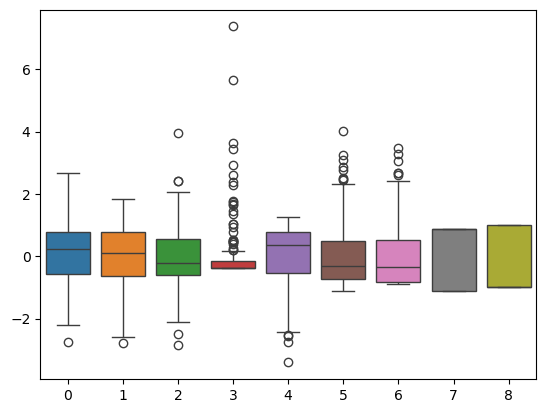

In [120]:
sns.boxplot(x_train_scaled)

<Axes: >

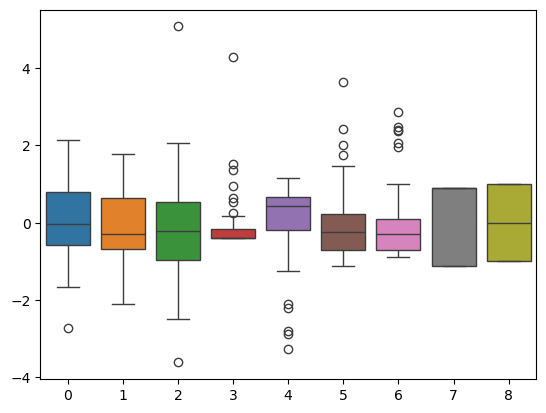

In [121]:
sns.boxplot(x_test_scaled)

## Model Training

In [128]:
# Linear Regression
linear = LinearRegression()
linear.fit(x_train_scaled,y_train)
y_pred = linear.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')
r2s = r2_score(y_test,y_pred)
print(f'R2 Score: {r2s}')

MSE: 3.572615885082046
R2 Score: 0.752953445232522


In [131]:
# Lasso: To feature selection
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')
r2s = r2_score(y_test,y_pred)
print(f'R2 Score: {r2s}')

MSE: 5.148135589928088
R2 Score: 0.6440061842981017


In [132]:
# Ridge: to handle overfitting
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')
r2s = r2_score(y_test,y_pred)
print(f'R2 Score: {r2s}')

MSE: 3.589348502319239
R2 Score: 0.7517963839716255


In [134]:
# Elastic Net: hybrid 
elastic = ElasticNet(l1_ratio=0.6)
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')
r2s = r2_score(y_test,y_pred)
print(f'R2 Score: {r2s}')

MSE: 5.076118568480491
R2 Score: 0.6489861646837723


<Axes: xlabel='ISI'>

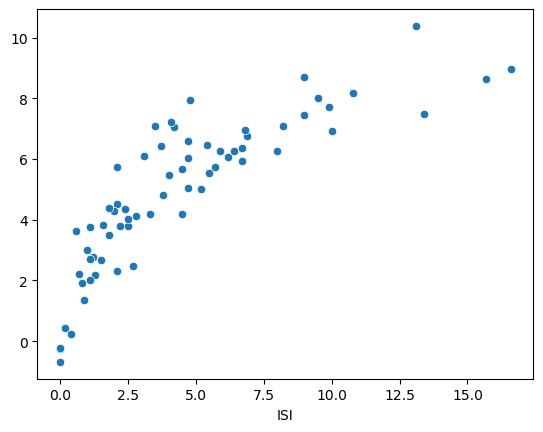

In [135]:
# Assumption Verification:
sns.scatterplot(x=y_test,y=y_pred)

## Predictions with Cross Validations

Mse: 3.589348502319239
R2 Score: 0.7517963839716255


<Axes: xlabel='ISI'>

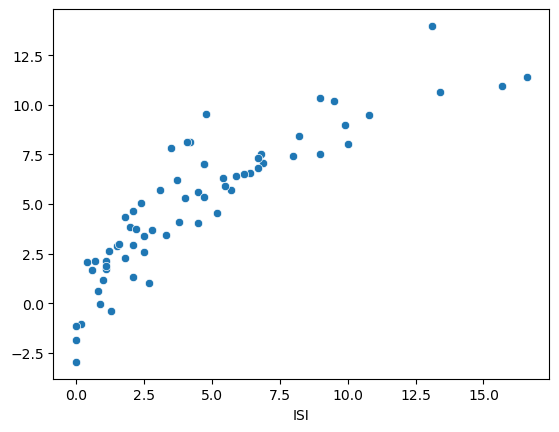

In [141]:
# Ridge Cv
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled,y_train)
y_pred_new = ridge_cv.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred_new)
r2_s = r2_score(y_test,y_pred_new)
print(f'Mse: {mse}')
print(f'R2 Score: {r2_s}')
sns.scatterplot(x=y_test,y=y_pred_new)

Mse: 3.672193175947997
R2 Score: 0.7460676709335736


<Axes: xlabel='ISI'>

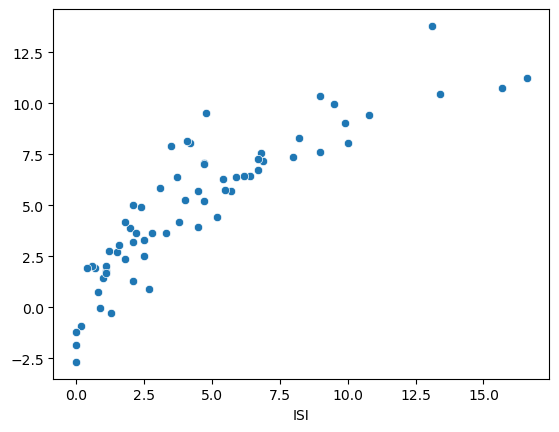

In [142]:
# Lasso CV:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train_scaled,y_train)
y_pred_new = lasso_cv.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred_new)
r2_s = r2_score(y_test,y_pred_new)
print(f'Mse: {mse}')
print(f'R2 Score: {r2_s}')
sns.scatterplot(x=y_test,y=y_pred_new)

Mse: 3.6593302389428057
R2 Score: 0.7469571436262841


<Axes: xlabel='ISI'>

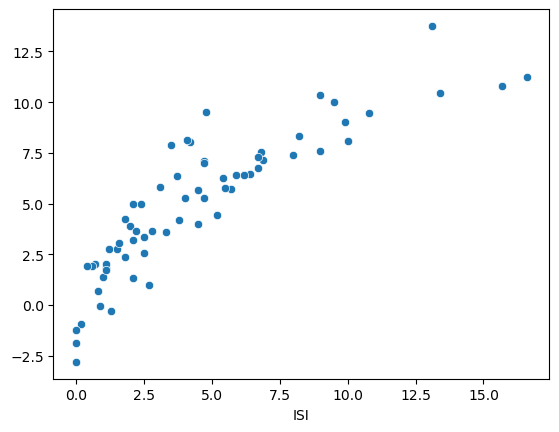

In [145]:
# ElasticNet CV
elasnet_cv = ElasticNetCV(l1_ratio=0.7,cv=5)
elasnet_cv.fit(x_train_scaled,y_train)
y_pred_new = elasnet_cv.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred_new)
r2_s = r2_score(y_test,y_pred_new)
print(f'Mse: {mse}')
print(f'R2 Score: {r2_s}')
sns.scatterplot(x=y_test,y=y_pred_new)